# Multi-class classification: [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**

Load in the libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import data as tf_data
import keras

seed = 42
keras.utils.set_random_seed(seed)

Leer los datos de train y test de [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), having 10 classes

|Label 	|Description |
| --- | --- |
|0 |	airplane |
|1 |	automobile |
|2 |	bird |
|3 |	cat |
|4 |	deer |
|5 |	dog |
|6 |	frog |
|7 |	horse |
|8 |	ship |
|9 |	truck |

 y generar un conjunto de validation

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# create validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.3, # select 30% for validation
                                                  random_state = seed)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


take a quick look

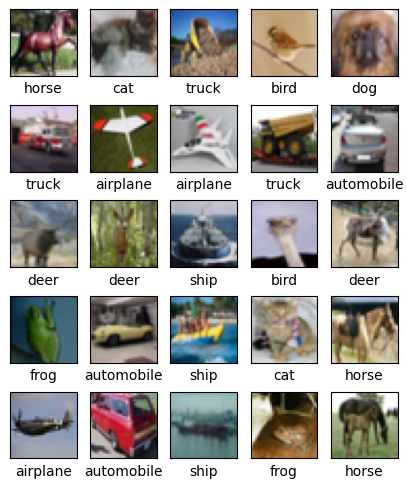

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

Normalize the data

In [4]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

One-hot encode the target labels

In [5]:
# convert class vectors to binary class matrices for use with categorical_crossentropy
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

Create a model

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

image_size = (32, 32)
input_shape = image_size + (3,) # three color channels
n_classes = 10

model = Sequential()
model.add(keras.Input(shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) # go from 2D to 1D
model.add(Dense(512, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

Compile and fit (train) the model

In [7]:
%%time

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
                   loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 3

history = model.fit(X_train, y_train_encoded,
                    validation_data = (X_val, y_val_encoded),
                    epochs = epochs,)

Epoch 1/3
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 54s 48ms/step - accuracy: 0.3109 - loss: 1.8592 - val_accuracy: 0.5325 - val_loss: 1.3503
Epoch 2/3
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 64s 59ms/step - accuracy: 0.5546 - loss: 1.2586 - val_accuracy: 0.6182 - val_loss: 1.1038
Epoch 3/3
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 75s 53ms/step - accuracy: 0.6395 - loss: 1.0370 - val_accuracy: 0.6527 - val_loss: 1.0083
CPU times: user 4min 4s, sys: 4.49 s, total: 4min 9s
Wall time: 3min 13s


Plot the learning curves

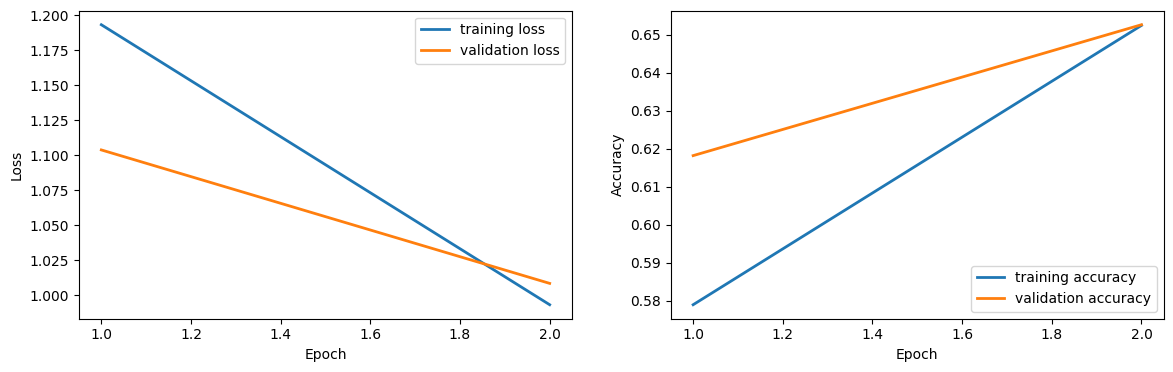

In [8]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"accuracy"], lw=2, label='training accuracy')
plt.plot(logs.loc[1:,"val_accuracy"], lw=2, label='validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

Final model evaluation on test set

In [9]:
model.evaluate(X_test, y_test_encoded, return_dict=True, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6550 - loss: 0.9969


{'accuracy': 0.6547999978065491, 'loss': 1.0044735670089722}

Confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


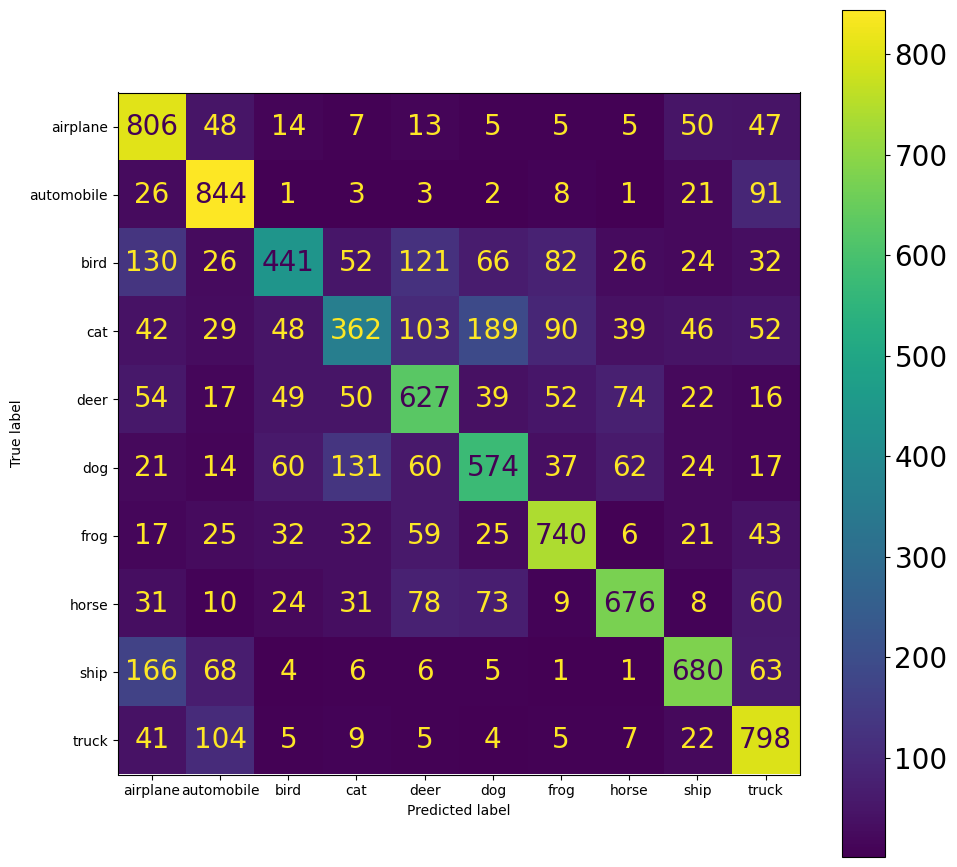

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Predict
y_prediction = model.predict(X_test)

y_pred_classes = np.argmax(y_prediction, axis = 1)
# Convert validation probabilities to one hot vectors
y_true = np.argmax(y_test_encoded, axis = 1)

# Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_true, y_pred_classes , normalize='pred')

cm = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(11,11))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.rcParams.update({'font.size': 20})
disp.plot(ax=ax);

Which images is most confused?

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred_classes)

0.6548

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.60      0.81      0.69      1000
           1       0.71      0.84      0.77      1000
           2       0.65      0.44      0.53      1000
           3       0.53      0.36      0.43      1000
           4       0.58      0.63      0.60      1000
           5       0.58      0.57      0.58      1000
           6       0.72      0.74      0.73      1000
           7       0.75      0.68      0.71      1000
           8       0.74      0.68      0.71      1000
           9       0.65      0.80      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

